# Data Viz

In [2]:
## ------------------------Installing libraries------------------------------------------------
# Install from CRAN
#install.packages("tidyverse")
#install.packages("lubridate")
#install.packages("openxlsx")
#install.packages("Hmisc")

In [3]:
##______________________________ LOADING LIBRARIES________________________
library(readr)
library(tidyverse)
library(lubridate)
library(ggplot2)
library(openxlsx)

-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.2     v purrr     1.0.1
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# Functions

## This function reads csv data files
read_data <- function(filename, delim_f, skip_f) {
    
    ## Read data file
    data <- read_delim(filename, delim=delim_f, skip=skip_f,
                   col_names=c("datetime","O3","NO2","SO2","CO","PM10","TEMP","PREC","RAD"), show_col_types = FALSE)
    # show_col_types = TRUE shows the column types to explicit what each column contains

    return(data)
}

In [5]:
## Specify settings
#Sys.setlocale("LC_TIME","C")
Sys.setlocale("LC_ALL","English")
options(stringsAsFactors=FALSE)
theme_set(theme_bw()) # just my preference for plots

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [6]:
## ------------------LOADING DATA------------------------------------------------------
## Define input file (located in same directory)
BASEL <- "./Data/BAS(1).csv"
file.exists(BASEL)

DAVOS <- "./Data/DAV.csv"
file.exists(DAVOS)

[1] FALSE

[1] TRUE

In [7]:
##____________________READING DATA_____________
#DAVOS_data <- read_data(DAVOS, ";", 6)
DAVOS_data <- read_delim(DAVOS, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","PM10","NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# BASEL_data <- read_data(BASEL, ";", 6)
## Read data file
BASEL_data <- read_delim(BASEL, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","SO2","PM10","PM2.5","EC", "CPC", "NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# show_col_types = TRUE shows the column types to explicit what each column contains


ERROR: Error: './Data/BAS(1).csv' does not exist in current working directory ('C:/Users/matheo/Desktop/EPFL/MA4/Air pollution/Air_pollution').


In [ ]:
## ------------------------------------------------------------------------
## View information stored in object
cat("Davos dataset:\n")
str(DAVOS_data)

cat("\nBasel dataset:\n")
str(BASEL_data)

In [ ]:
## ------------------------------------------------------------------------
## View first 6 lines
cat("DAVOS:\n")
head(DAVOS_data)
cat("\nBASEL:\n")
head(BASEL_data)

In [ ]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "Europe/Paris")

# Using $ to access the datetime column 
## TO DO only once
DAVOS_data$datetime <- parse_date_time(DAVOS_data$datetime, "%d.%m.%Y %H:%M", tz = "Etc/GMT-1")

In [ ]:
# Extract the month
DAVOS_data[["month"]] <- month(DAVOS_data[["datetime"]])

# Extract the date (without time)
DAVOS_data[["date"]] <- date(DAVOS_data[["datetime"]])

# Check the results
head(DAVOS_data)

In [ ]:
## ---- fig.width=8, fig.height=5------------------------------------------
ggplot(DAVOS_data)+
  geom_line(aes(datetime, O3))

In [8]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "CEST")

# Using $ to access the datetime column
BASEL_data$datetime <- parse_date_time(BASEL_data$datetime, "%d.%m.%Y %H:%M", tz = "Etc/GMT-1")

ERROR: Error in .num_to_date(x): objet 'BASEL_data' introuvable


In [9]:
#checking table rows 
invalid_rows <- which(is.na(BASEL_data$datetime))
invalid_rows
invalid_dates <- BASEL_data[is.na(BASEL_data$datetime), ]
invalid_dates

ERROR: Error in which(is.na(BASEL_data$datetime)): objet 'BASEL_data' introuvable


In [10]:
# Extract the month
BASEL_data[["month"]] <- month(BASEL_data[["datetime"]])

# Extract the date (without time)
BASEL_data[["date"]] <- date(BASEL_data[["datetime"]])

# Check the results
head(BASEL_data)

ERROR: Error in month(BASEL_data[["datetime"]]): objet 'BASEL_data' introuvable


## Problem 3

In [11]:
reg_val <- "./Data/Regulatory_values.xlsx"
file.exists(reg_val)

limits.daily <- read.xlsx(reg_val, sheet = 1)

[1] TRUE

In [12]:
# Second option
limits.daily <- tibble(value=c(100,80,8,50),
                       variable=c("SO2","NO2","CO","PM10"))

In [13]:
limits.daily

value,variable
<dbl>,<chr>
100,SO2
80,NO2
8,CO
50,PM10


In [14]:
Sys.setlocale("LC_TIME","C")
options(stringsAsFactors=FALSE)
options(dplyr.summarise.inform = FALSE)
theme_set(theme_bw()) # just my preference for plots

[1] "C"

In [15]:
month2season <- function(month) {
  ## month is an integer (1-12)
  ## a factor with levels {"Winter : DJF", "Spring : MAM", "Summer : JJA", "Autumn : SON"} is returned
  seasons <- c("Winter", "Spring", "Summer", "Autumn")
  index <- findInterval(month %% 12, seq(0, 12, 3))
  factor(seasons[index], seasons)
}

wday2type <- function(wday) {
  ## wday is an integer with 1 = Monday, 2 = Tuesday, ... and 7 = Sunday
  c("Weekday", "Weekend")[(unclass(wday) - 1) %/% 5 + 1]
}

In [16]:
month2season(c(1, 2, 3))

[1] Winter Winter Spring
Levels: Winter Spring Summer Autumn

In [17]:
read_tseries <- function(filename, timecolumn = "Date/time", timeformat = "%d.%m.%Y %H:%M", tz = "Etc/GMT-1", delta = 3600) {
  ## read the table, strip units in column names, rename time column
  ##   and change data type of time column from a string of characters to
  ##   a numeric type so that we can perform operations on it

  data <- read_delim(filename, skip = 5, delim = ";", locale = locale(encoding = "Latin1"), show_col_types = FALSE)

  out <- data %>%
    rename_with(.fn = function(x) sub("[ ].*$", "", x)) %>% # strip units for simplification
    rename(datetime = !!timecolumn) %>%
    mutate(datetime = parse_date_time(datetime, !!timeformat, !!tz) - !!delta) %>%
    mutate(year = year(datetime),
           month = month(datetime),
           day = day(datetime),
           hour = hour(datetime),
           dayofwk = wday(datetime, label = TRUE, week_start = 1),
           daytype = wday2type(dayofwk),
           season = month2season(month),
           .after = datetime)
}

In [18]:
datapath <- file.path("Data")

all_data_df <- full_join(
  bind_cols(site="DAV", read_tseries(file.path(datapath, "DAV.csv"))),
  bind_cols(site="BAS", read_tseries(file.path(datapath, "BAS.csv")))
)

Joining with `by = join_by(site, datetime, year, month, day, hour, dayofwk, daytype, season, O3, NO2, PM10, NOX, TEMP,
PREC, RAD)`


In [19]:
all_data_df

site,datetime,year,month,day,hour,dayofwk,daytype,season,O3,NO2,PM10,NOX,TEMP,PREC,RAD,SO2,PM2.5,EC,CPC
<chr>,<dttm>,<dbl>,<dbl>,<int>,<int>,<ord>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,57.7,1.9,1.2,1.9,-2.2,0,-0.6,NA,NA,NA,NA
DAV,2024-01-01 01:00:00,2024,1,1,1,Mon,Weekday,Winter,55.2,2.1,1.5,2.1,-2.8,0,-0.7,NA,NA,NA,NA
DAV,2024-01-01 02:00:00,2024,1,1,2,Mon,Weekday,Winter,49.9,3.7,2.2,3.7,-3.3,0,-0.7,NA,NA,NA,NA
DAV,2024-01-01 03:00:00,2024,1,1,3,Mon,Weekday,Winter,52.1,4.5,3.0,4.6,-4.2,0,-1.1,NA,NA,NA,NA
DAV,2024-01-01 04:00:00,2024,1,1,4,Mon,Weekday,Winter,65.8,0.7,0.2,0.7,-5.2,0,-1.3,NA,NA,NA,NA
DAV,2024-01-01 05:00:00,2024,1,1,5,Mon,Weekday,Winter,67.1,0.7,0.4,0.7,-5.6,0,-0.8,NA,NA,NA,NA
DAV,2024-01-01 06:00:00,2024,1,1,6,Mon,Weekday,Winter,64.0,3.4,0.3,3.5,-5.7,0,-0.6,NA,NA,NA,NA
DAV,2024-01-01 07:00:00,2024,1,1,7,Mon,Weekday,Winter,58.4,5.4,0.3,5.4,-5.9,0,-0.6,NA,NA,NA,NA
DAV,2024-01-01 08:00:00,2024,1,1,8,Mon,Weekday,Winter,61.8,1.7,0.3,1.8,-5.7,0,22.6,NA,NA,NA,NA


In [20]:
write.csv(all_data_df, "DATA/DAV-BAS.csv")

In [21]:
all_data_lf <- all_data_df %>%
  pivot_longer(-c(site, datetime, season, year, month, day, hour, dayofwk, daytype),  # id columns
               names_to = "variable",
               values_to = "value")

In [22]:
all_data_lf

site,datetime,year,month,day,hour,dayofwk,daytype,season,variable,value
<chr>,<dttm>,<dbl>,<dbl>,<int>,<int>,<ord>,<chr>,<fct>,<chr>,<dbl>
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,O3,57.7
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,NO2,1.9
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PM10,1.2
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,NOX,1.9
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,TEMP,-2.2
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PREC,0.0
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,RAD,-0.6
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,SO2,NA
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PM2.5,NA


Warning message:
"Removed 17568 rows containing missing values (`geom_line()`)."


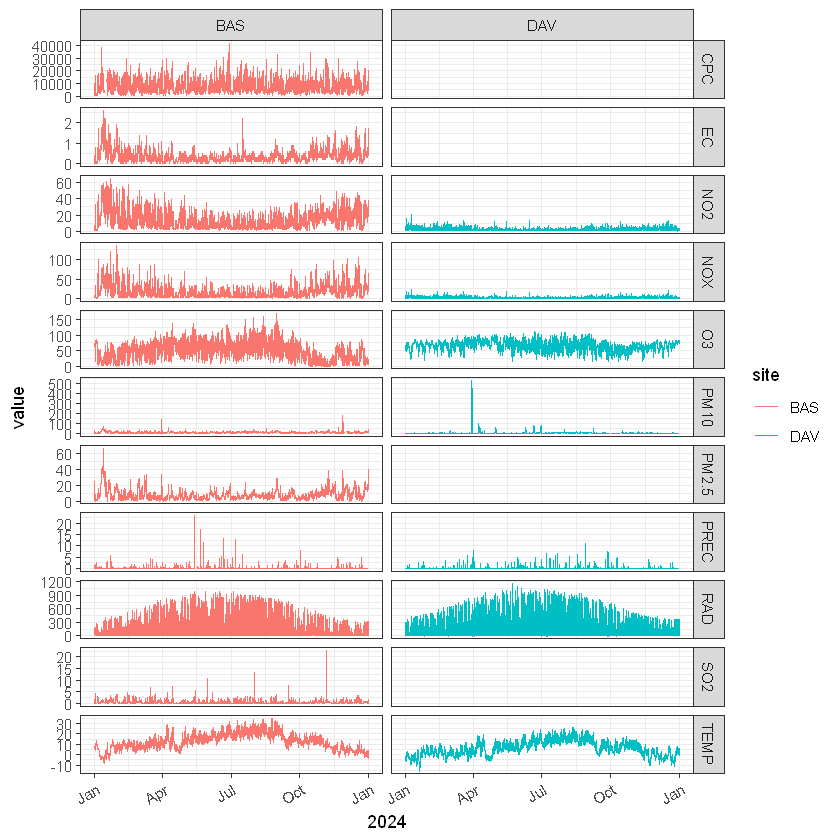

In [23]:
  ggplot(all_data_lf)+                                        # `lf` is the data frame
  facet_grid(variable~site, scale="free_y")+         # panels created out of these variables
  geom_line(aes(datetime, value, color=site))+       # plot `value` vs. `time` as lines
  scale_x_datetime("2024", date_labels = "%b") +
  theme(axis.text.x=element_text(angle=30, hjust=1)) # rotate x-axis labels

## geom_line counts the segments and not the actual number of NA values removed

In [24]:
## There are more NA values than segments because we have consecutive Na Values
sum(is.na(all_data_lf$value))

[1] 36281

## checking data completeness

In [25]:
colSums(is.na(DAVOS_data))

datetime       O3      NO2     PM10      NOx     TEMP     PREC      RAD 
       0       18       22       98       22        0        1        0

In [26]:
colSums(is.na(BASEL_data))

ERROR: Error in is.data.frame(x): objet 'BASEL_data' introuvable


In [ ]:
colSums(is.na(all_data_df))

In [ ]:
all_data_lf %>% 
  mutate(month = factor(month)) %>%
  ggplot +
  facet_grid(variable ~ site, scale = "free_y") +
  geom_boxplot(aes(month, value), outlier.size = 0.5, outlier.shape = 3)

In [ ]:
# DAVOS 
all_data_lf %>%
  filter(site=="DAV" & !is.na(value) & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_boxplot(aes(daytype, value), outlier.size = 0.5, outlier.shape = 3)

In [ ]:
# BASEL
all_data_lf %>%
  filter(site == "BAS" & !is.na(value) & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_boxplot(aes(daytype, value), outlier.size = 0.5, outlier.shape = 3)

In [ ]:
#DAVOS
all_data_lf %>%
  filter(site=="DAV" & !is.na(value) & variable=="PREC" & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_bar(aes(daytype, value), stat="summary", fun="mean", show.legend = FALSE) +
  scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1)))

In [ ]:
#DAVOS
all_data_lf %>%
  filter(site=="DAV" & !is.na(value) & variable=="PREC" & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_bar(aes(daytype, value), stat="summary", fun="mean", show.legend = FALSE) +
  scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1)))

In [ ]:
# BASEL
all_data_lf %>%
  filter(site=="BAS" & !is.na(value) & variable=="PREC" & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_bar(aes(daytype, value), stat="summary", fun="mean", show.legend = FALSE) +
  scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1)))

## Diurnal variations

In [ ]:
Percentile <- function(perc) function(x) 
  ## `perc` is the percentile which should be computed for the numeric vector `x`
  quantile(x, perc*1e-2, na.rm=TRUE)

In [ ]:
all_data_lf %>%
  filter(site=="DAV" & !is.na(value) & !is.na(season)) %>%
  ggplot(aes(x=hour, y=value, group=daytype, color=daytype)) +
  facet_grid(variable ~ season, scale = "free_y", drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("DAVOS")

In [ ]:
all_data_lf %>%
  filter(site=="BAS" & !is.na(value) & !is.na(season)) %>%
  ggplot(aes(x=hour, y=value, group=daytype, color=daytype)) +
  facet_grid(variable ~ season, scale = "free_y", drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("BASEL")

In [ ]:
all_data_lf %>%
  filter(variable=="O3" & !is.na(season)) %>%
  ggplot(aes(x=hour, y=value, group=daytype, color=daytype)) +
  facet_grid(site ~ season, drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("O3")

In [ ]:
all_data_lf %>%
  filter(variable=="O3"& !is.na(season)) %>%
  ggplot(aes(x=hour, y=value, group=site, color=site)) +
  facet_grid(season ~ dayofwk, drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("O3")

In [ ]:
Ox_lf <- all_data_lf %>% 
  filter(variable %in% c("O3", "NO2") & season=="Summer") %>%
  pivot_wider(names_from = variable, values_from = value) %>%
  mutate(Ox = O3 + NO2) %>%
  select(-NO2) %>%
  gather(variable, value, c(O3, Ox))

In [ ]:
Ox_lf %>%
  ggplot(aes(x=hour, y=value, group=variable, color=variable)) +
  facet_grid(site ~ daytype, drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("Summer sum of oxidants")

In [ ]:
Ox_lf %>% 
  pivot_wider(names_from = variable, values_from = value) %>%
  mutate(ratio = 1 - O3/Ox) %>%
  ggplot(aes(x=hour, y=ratio)) +
  facet_grid(site ~ daytype, drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75)) +
  scale_y_continuous(expression(NO[2]/O[x]), limits=c(0, 1))

# Limit values

In [ ]:
reg_val <- "./Data/Regulatory_values.xlsx"
file.exists(reg_val)

Regulatory_values <- read.xlsx(reg_val, sheet = 1)
Regulatory_values

In [ ]:
limits.yearly<- tibble(value=c(30, 20, 10, 30),
                       variable=c("NO2","PM10", "PM2.5", "SO2"))

In [27]:
limits.daily <- tibble(value=c(80, 50, 100),
                       variable=c("NO2","PM10", "SO2"))

In [28]:
limits.hourly<- tibble(value=c(120),
                       variable=c("O3"))

In [29]:
## Mean threshold definition
threshold <- 75

## Daily limit values

In [30]:
daily_lf <- all_data_lf %>%
  filter(variable %in% limits.daily[["variable"]]) %>% # select variables
  mutate(date = date(datetime)) %>%                   # get the date value
  group_by(site, date, variable) %>%
  summarize(percent.recovery_daily = length(na.omit(value))/length(value)*1e2,
            value = mean(value, na.rm=TRUE)) %>%
  ungroup()                                            # undo grouping for future use

In [31]:
daily_lf

site,date,variable,percent.recovery_daily,value
<chr>,<date>,<chr>,<dbl>,<dbl>
BAS,2024-01-01,NO2,100.00000,6.7166667
BAS,2024-01-01,PM10,100.00000,7.0083333
BAS,2024-01-01,SO2,100.00000,0.5291667
BAS,2024-01-02,NO2,100.00000,5.7750000
BAS,2024-01-02,PM10,100.00000,2.4958333
BAS,2024-01-02,SO2,100.00000,1.0291667
BAS,2024-01-03,NO2,100.00000,1.2416667
BAS,2024-01-03,PM10,100.00000,2.8958333
BAS,2024-01-03,SO2,100.00000,0.1166667


In [32]:
# looking at the data that has less than 75% of valid datapoionts
daily_lf %>%
  filter(percent.recovery_daily < threshold) %>%
  count(site, variable)

site,variable,n
<chr>,<chr>,<int>
BAS,NO2,4
BAS,PM10,5
BAS,SO2,2
DAV,PM10,4
DAV,SO2,366


In [33]:
filter(daily_lf, percent.recovery_daily < threshold & variable=="PM10") 

site,date,variable,percent.recovery_daily,value
<chr>,<date>,<chr>,<dbl>,<dbl>
BAS,2024-10-14,PM10,0.00000,NaN
BAS,2024-10-21,PM10,0.00000,NaN
BAS,2024-10-31,PM10,0.00000,NaN
BAS,2024-12-01,PM10,58.33333,14.64286
BAS,2024-12-29,PM10,50.00000,16.20000
DAV,2024-10-01,PM10,0.00000,NaN
DAV,2024-10-14,PM10,0.00000,NaN
DAV,2024-10-21,PM10,0.00000,NaN
DAV,2024-10-31,PM10,0.00000,NaN


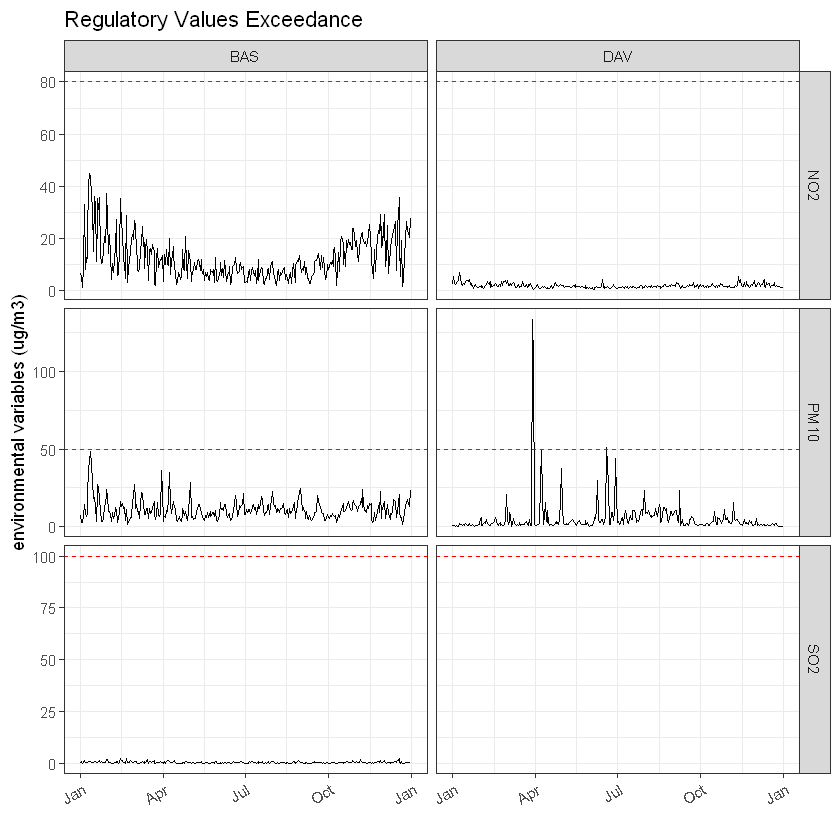

In [36]:
limit_values_overshoot <- daily_lf %>%
  filter(percent.recovery_daily >= threshold) %>%
  ggplot+
  facet_grid(variable~site, scale="free_y")+  
  geom_line(aes(x=date, y=value))+
  geom_hline(data=limits.daily, mapping=aes(yintercept=value), linetype=2, color="red")+
  scale_x_date(name = "", date_labels = "%b") +
  theme(axis.text.x=element_text(angle=30, hjust=1))+
  labs(
    x = "Months",  # Label for the x-axis
    y = "environmental variables (ug/m3)",  # Label for the y-axis
    title = "Regulatory Values Exceedance"  # Title for the plot
  )

limit_values_overshoot
ggsave("outputs/limit_values_overshoot.jpeg", plot = limit_values_overshoot, width = 6, height = 5, dpi = 300)

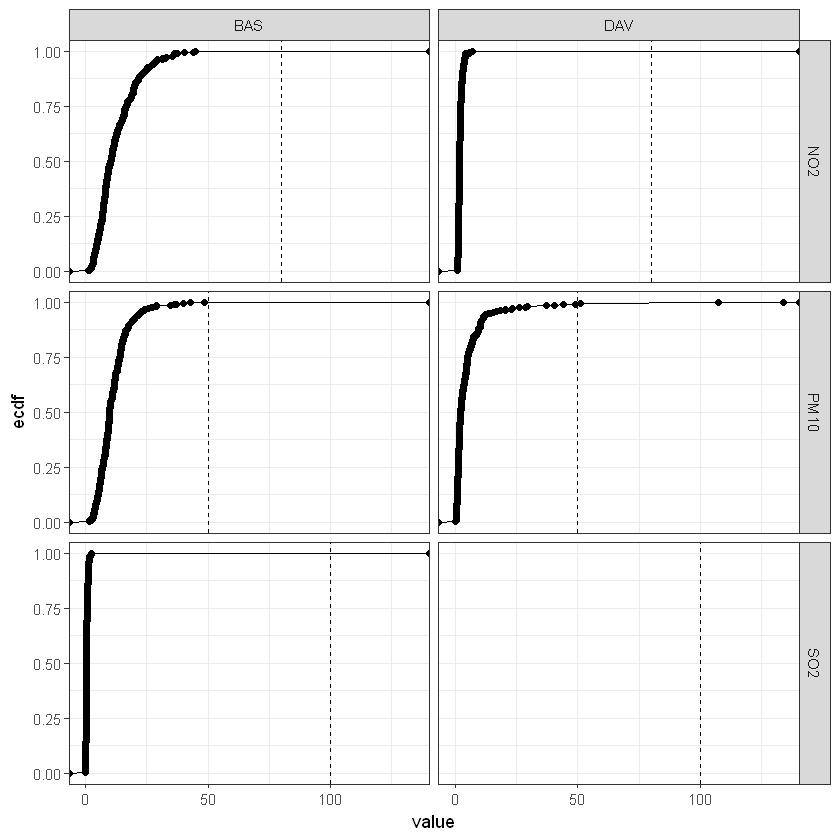

In [35]:
daily_lf %>%
  filter(percent.recovery_daily >= threshold) %>%
  ggplot+
  facet_grid(variable~site, scale="free_y")+  
  geom_line(aes(x=value), stat="ecdf")+
  geom_point(aes(x=value), stat="ecdf")+
  geom_vline(data=limits.daily, mapping=aes(xintercept=value), linetype=2)

## Tables of interest for daily exceeding values

In [57]:
(limits.vec <- with(limits.daily, setNames(value, variable)))

NO2 PM10  SO2 
  80   50  100

In [58]:
exceedances <- daily_lf %>%
  filter(percent.recovery_daily >= threshold &
         value > limits.vec[as.character(variable)])

In [59]:
tail(exceedances, 3)

site,date,variable,percent.recovery_daily,value
<chr>,<date>,<chr>,<dbl>,<dbl>
DAV,2024-03-29,PM10,100,133.76250
DAV,2024-03-30,PM10,100,107.39583
DAV,2024-06-19,PM10,100,51.05417


In [60]:
exceedances %>%
  count(site, variable)

site,variable,n
<chr>,<chr>,<int>
DAV,PM10,3


In [61]:
exceedances %>%
  mutate(month = months(date)) %>%
  count(site, variable, month)

site,variable,month,n
<chr>,<chr>,<chr>,<int>
DAV,PM10,June,1
DAV,PM10,March,2


## Yearly limit values

In [62]:
yearly_lf <- all_data_lf %>%
  filter(variable %in% limits.yearly[["variable"]]) %>% # select variables
  mutate(date = date(datetime)) %>%                   # get the date value
  group_by(site, variable) %>%
  summarize(percent.recovery_yearly = length(na.omit(value))/length(value)*1e2,
            value = mean(value, na.rm=TRUE)) %>%
  ungroup()                                            # undo grouping for future use

In [63]:
yearly_lf

site,variable,percent.recovery_yearly,value
<chr>,<chr>,<dbl>,<dbl>
BAS,NO2,99.15756,12.5449024
BAS,PM10,98.71357,11.1924922
BAS,PM2.5,96.80100,7.7528755
BAS,SO2,99.22587,0.5051514
DAV,NO2,99.74954,1.9491326
DAV,PM10,98.88434,5.1367833
DAV,PM2.5,0.00000,NaN
DAV,SO2,0.00000,NaN


yearly_lf %>%
  filter(percent.recovery_yearly >= threshold) %>%
  ggplot+
  facet_grid(variable~site, scale="free_y")+  
  geom_line(aes(y=value))+
  geom_hline(data=limits.yearly, mapping=aes(yintercept=value), linetype=2, color="red")+
  scale_x_date(name = "", date_labels = "%b") +
  theme(axis.text.x=element_text(angle=30, hjust=1))

Yearly values are never exceeded. TODO : create a table in overleaf to compare the obtained results to the limit values

## Hourly values

In [64]:
hourly_lf <- all_data_lf %>%
  filter(variable %in% limits.hourly[["variable"]]) %>% # select variables
  #mutate(date = date(datetime)) %>%                   # get the date value
  group_by(site, datetime, variable) %>%
  summarize(percent.recovery_hourly = length(na.omit(value))/length(value)*1e2,
            value = mean(value, na.rm=TRUE)) %>%
  ungroup()                                            # undo grouping for future use

In [65]:
hourly_lf

site,datetime,variable,percent.recovery_hourly,value
<chr>,<dttm>,<chr>,<dbl>,<dbl>
BAS,2024-01-01 00:00:00,O3,100,60.2
BAS,2024-01-01 01:00:00,O3,100,70.0
BAS,2024-01-01 02:00:00,O3,100,70.3
BAS,2024-01-01 03:00:00,O3,100,67.0
BAS,2024-01-01 04:00:00,O3,100,66.5
BAS,2024-01-01 05:00:00,O3,100,67.1
BAS,2024-01-01 06:00:00,O3,100,70.1
BAS,2024-01-01 07:00:00,O3,100,71.7
BAS,2024-01-01 08:00:00,O3,100,64.6


In [66]:
hourly_lf$datetime <- as.POSIXct(hourly_lf$datetime)

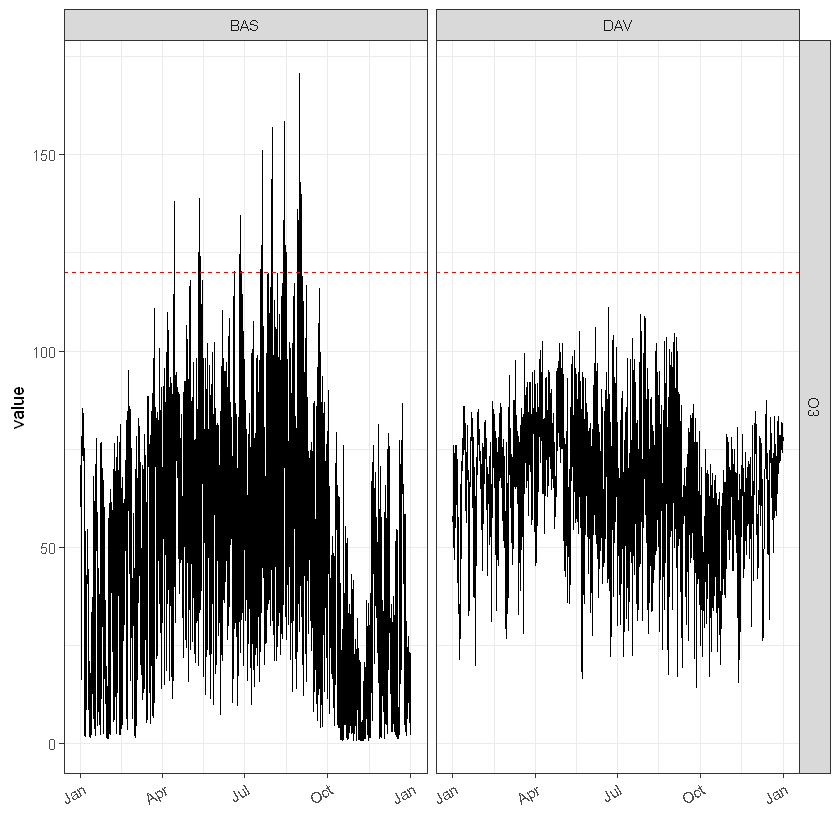

In [67]:
hourly_lf %>%
  filter(percent.recovery_hourly >= threshold) %>%
  ggplot(aes(x = datetime, y = value)) +        
  facet_grid(variable ~ site, scale = "free_y") +  
  geom_line() +                                 
  geom_hline(data = limits.hourly, aes(yintercept = value), linetype = 2, color = "red") + 
  scale_x_datetime(name = "", date_labels = "%b") +  # Use scale_x_datetime here
  theme(axis.text.x = element_text(angle = 30, hjust = 1))

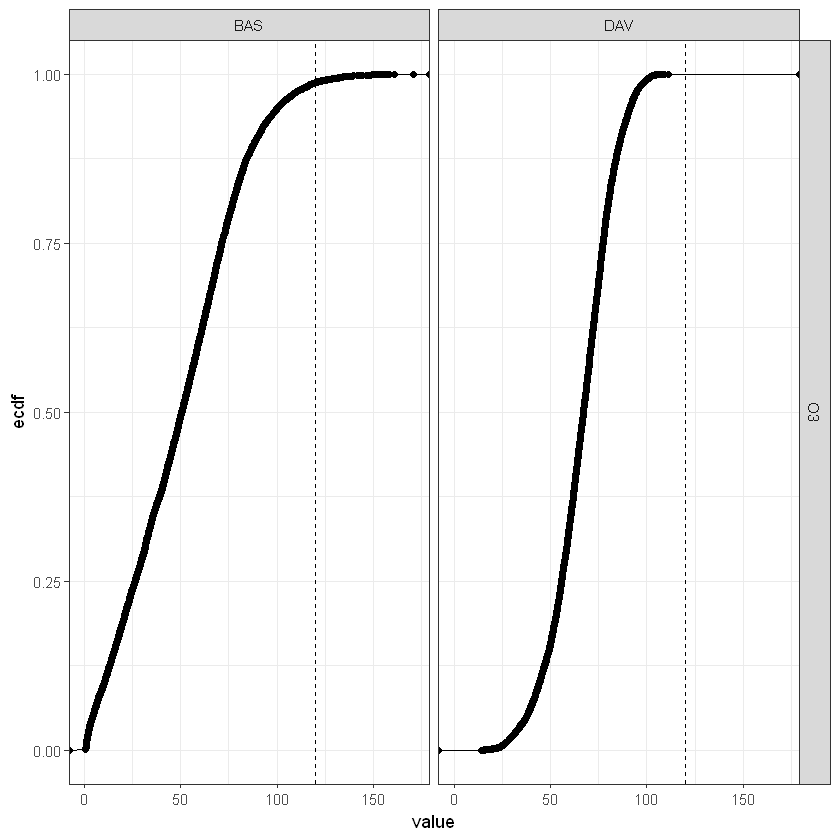

In [68]:
hourly_lf %>%
  filter(percent.recovery_hourly >= threshold) %>%
  ggplot+
  facet_grid(variable~site, scale="free_y")+  
  geom_line(aes(x=value), stat="ecdf")+
  geom_point(aes(x=value), stat="ecdf")+
  geom_vline(data=limits.hourly, mapping=aes(xintercept=value), linetype=2)

## Tables of hourly exceeding values

In [69]:
(hourly_limits.vec <- with(limits.hourly, setNames(value, variable)))

O3 
120

In [70]:
hourly_exceedances <- hourly_lf %>%
  filter(percent.recovery_hourly >= threshold &
         value > hourly_limits.vec[as.character(variable)])

In [71]:
head(hourly_exceedances)

site,datetime,variable,percent.recovery_hourly,value
<chr>,<dttm>,<chr>,<dbl>,<dbl>
BAS,2024-04-13 13:00:00,O3,100,123.2
BAS,2024-04-13 14:00:00,O3,100,129.9
BAS,2024-04-13 15:00:00,O3,100,134.7
BAS,2024-04-13 16:00:00,O3,100,134.0
BAS,2024-04-13 17:00:00,O3,100,138.0
BAS,2024-05-10 16:00:00,O3,100,121.8


In [72]:
tail(hourly_exceedances)

site,datetime,variable,percent.recovery_hourly,value
<chr>,<dttm>,<chr>,<dbl>,<dbl>
BAS,2024-09-01 12:00:00,O3,100,125.3
BAS,2024-09-01 13:00:00,O3,100,131.4
BAS,2024-09-01 14:00:00,O3,100,133.6
BAS,2024-09-01 15:00:00,O3,100,139.8
BAS,2024-09-01 16:00:00,O3,100,126.0
BAS,2024-09-01 21:00:00,O3,100,121.4


In [73]:
hourly_exceedances %>%
  count(site, variable)

site,variable,n
<chr>,<chr>,<int>
BAS,O3,109


In [74]:
hourly_exceedances %>%
  mutate(month = months(datetime)) %>%
  count(site, variable, month)

site,variable,month,n
<chr>,<chr>,<chr>,<int>
BAS,O3,April,5
BAS,O3,August,52
BAS,O3,July,24
BAS,O3,June,7
BAS,O3,May,15
BAS,O3,September,6
